#### 
NAME  : RAHINI DEVI S

ROLLNO: 225229129

PDL Lab - 15: Text dataset creation and design of Simple RNN for Sentiment Analysis

### 1. Import libraries

In [1]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\sweth\Downloads\nlp\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sweth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

### 2. Creation of data

In [6]:
df = pd.read_csv("data.csv",encoding="ISO-8859-1")

In [7]:
df.head()

,Labels,Quotes
0,0,"Look deep into nature, and then you will under..."
1,0,Colors are the smiles of nature
2,0,"I believe in God, only I spell it Nature"
3,0,"Nature does not hurry, yet everything is accom..."
4,0,"If you truly love nature, you will find beauty..."


### 3. Opening your CSV file

In [8]:
import csv

In [9]:
file = open('data.csv')
type(file)

_io.TextIOWrapper

In [10]:
csvreader = csv.reader(file)

In [11]:
header = []
header = next(csvreader)
header

['Labels', 'Quotes']

In [24]:
with open('data.csv', 'r') as file:
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
row

['1',
 'Technology brings convenience but often disconnects us from the natural world']

In [25]:
file.close()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  12 non-null     int64 
 1   Quotes  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


### 4. Pre-processing the text

In [27]:
y = df['Labels']
X = df['Quotes']

### 5. Dataset Preparation

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [29]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(8,)
(4,)
(8,)
(4,)


In [30]:
# 4th step to be continue
train_token = Tokenizer(num_words=100,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:10])

{'<oov>': 1,
 'the': 2,
 'is': 3,
 'of': 4,
 'nature': 5,
 'you': 6,
 'but': 7,
 'into': 8,
 'a': 9,
 'will': 10}

In [31]:
vocab = len(train_token.word_index) + 1
vocab

63

In [32]:
train_sequence[3]

[28, 29, 8, 5, 30, 31, 6, 10, 32, 33, 34]

In [33]:
train_padded = pad_sequences(train_sequence,maxlen=100,padding='post')
train_padded[5]

array([41,  3, 11, 42, 12, 43,  2, 44,  7, 12, 45, 46, 47,  2, 48,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [34]:
train_padded.shape

(8, 100)

In [35]:
val_token = Tokenizer(num_words=500,oov_token='<oov>')
val_token.fit_on_texts(X_val)
val_index = val_token.word_index
val_sequence = val_token.texts_to_sequences(X_val)

In [37]:
if len(val_sequence) > 4:
    # Access the element at index 4
    value = val_sequence[4]
else:
    # Handle the case where the list doesn't have enough elements
    print("The list doesn't have enough elements.")


The list doesn't have enough elements.


In [38]:
val_padded = pad_sequences(val_sequence,maxlen=100,padding='post')

### 6. Model Creation

In [40]:
model = Sequential()
# Embedding layer
model.add(Embedding(300,70,input_length=100))
model.add(SimpleRNN(70,activation='relu'))
model.add(Dense('1',activation='sigmoid'))

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 70)           21000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 70)                9870      
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 30941 (120.86 KB)
Trainable params: 30941 (120.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
history=model.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 3s - loss: 0.6932 - accuracy: 0.5000 - 3s/epoch - 3s/step
Epoch 2/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 33ms/epoch - 33ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 25ms/epoch - 25ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 25ms/epoch - 25ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 35ms/epoch - 35ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 31ms/epoch - 31ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 45ms/epoch - 45ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 32ms/epoch - 32ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 30ms/epoch - 30ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 27ms/epoch - 27ms/step


In [44]:
model.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 447ms/step - loss: 0.6931 - accuracy: 0.5000


[0.693149745464325, 0.5]

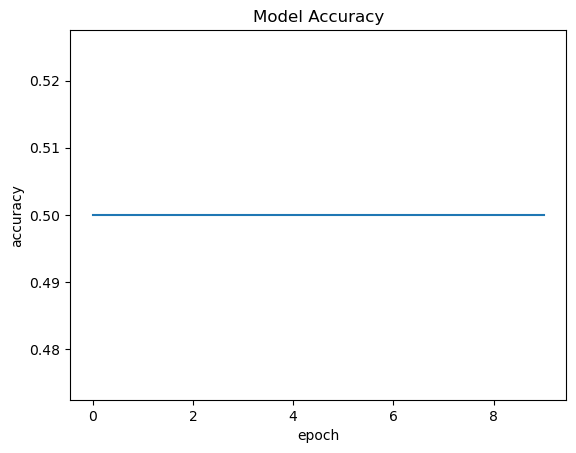

In [45]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

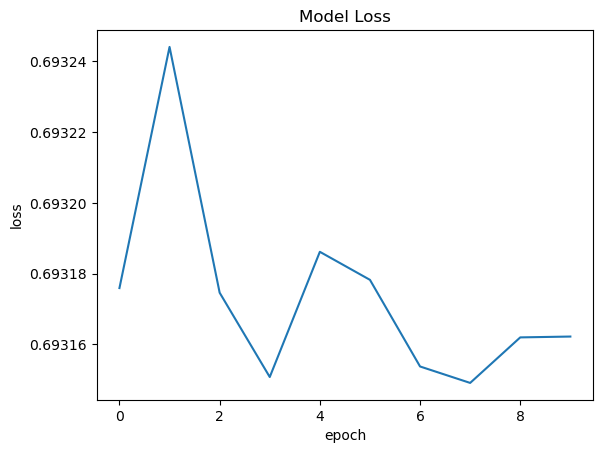

In [46]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [47]:
text = df["Quotes"]

In [48]:
#sent = [w.lower() for w in text.split() if not w in STOPWORDS]
trail_token = Tokenizer()
trail_token.fit_on_texts(text)
#word_index = trail_token.word_index
trail_seq = trail_token.texts_to_sequences(text)
#dict(list(word_index.items())[0:10])
trail_pad = pad_sequences(trail_seq,maxlen=100,padding='post')

In [49]:
trail_pad

array([[20, 21, 10, ...,  0,  0,  0],
       [26, 27,  1, ...,  0,  0,  0],
       [13, 29, 30, ...,  0,  0,  0],
       ...,
       [ 1, 66, 18, ...,  0,  0,  0],
       [ 2,  4, 71, ...,  0,  0,  0],
       [77, 78, 79, ...,  0,  0,  0]])

### Step-7:

In [50]:
res = model.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 314ms/step
[[0.49886647]
 [0.49886647]
 [0.49886647]
 [0.49886647]
 [0.49886647]
 [0.49886647]
 [0.49886647]
 [0.49886647]
 [0.49886647]
 [0.49886647]
 [0.49886647]
 [0.49886647]] negative


C:\Users\sweth\AppData\Local\Temp\ipykernel_11424\1535703611.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Step-8:

### Model 2

In [51]:
model1 = Sequential()
# Embedding layer
model1.add(Embedding(5000,64,input_length=100))
model1.add(SimpleRNN(32,activation='tanh'))
model1.add(Embedding(5000,32,input_length=100))
model1.add(SimpleRNN(32,activation='tanh' ))
model1.add(Dense('1',activation='sigmoid'))

In [52]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 embedding_2 (Embedding)     (None, 32, 32)            160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 485217 (1.85 MB)
Trainable params: 485217 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history1=model1.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 3s - loss: 0.6933 - accuracy: 0.5000 - 3s/epoch - 3s/step
Epoch 2/10
1/1 - 0s - loss: 0.6933 - accuracy: 0.5000 - 26ms/epoch - 26ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 17ms/epoch - 17ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 27ms/epoch - 27ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 17ms/epoch - 17ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 15ms/epoch - 15ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 16ms/epoch - 16ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 22ms/epoch - 22ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 22ms/epoch - 22ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 28ms/epoch - 28ms/step


In [55]:
model1.evaluate(val_padded,y_val)

1/1 [==============================] - 1s 524ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931710243225098, 0.5]

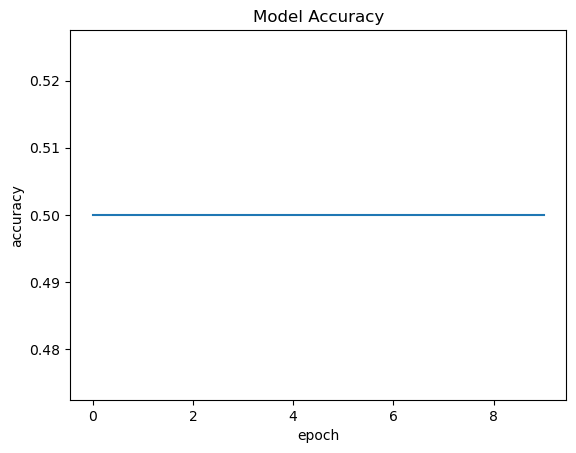

In [56]:
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

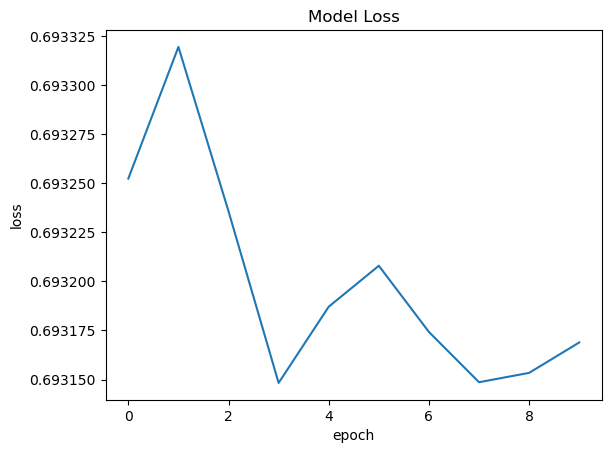

In [57]:
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [58]:
res = model1.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 414ms/step
[[0.49654844]
 [0.49654844]
 [0.49654844]
 [0.49654844]
 [0.49654844]
 [0.49654844]
 [0.49654844]
 [0.49654844]
 [0.49654844]
 [0.49654844]
 [0.49654844]
 [0.49654844]] negative


C:\Users\sweth\AppData\Local\Temp\ipykernel_11424\2701450631.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Model 3

In [59]:
model2 = Sequential()
# Embedding layer
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh'))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='relu' ))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh' ))
model2.add(Dense('1',activation='sigmoid'))

In [60]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          512000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_4 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_5 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 1)                

In [61]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
history2=model2.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 3s - loss: 0.6957 - accuracy: 0.5000 - 3s/epoch - 3s/step
Epoch 2/10
1/1 - 0s - loss: 0.6996 - accuracy: 0.5000 - 42ms/epoch - 42ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6949 - accuracy: 0.5000 - 31ms/epoch - 31ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 50ms/epoch - 50ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6944 - accuracy: 0.5000 - 37ms/epoch - 37ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6947 - accuracy: 0.5000 - 37ms/epoch - 37ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6938 - accuracy: 0.5000 - 47ms/epoch - 47ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 45ms/epoch - 45ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6935 - accuracy: 0.5000 - 52ms/epoch - 52ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6940 - accuracy: 0.5000 - 49ms/epoch - 49ms/step


In [63]:
model2.evaluate(val_padded,y_val)

1/1 [==============================] - 1s 815ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939154267311096, 0.5]

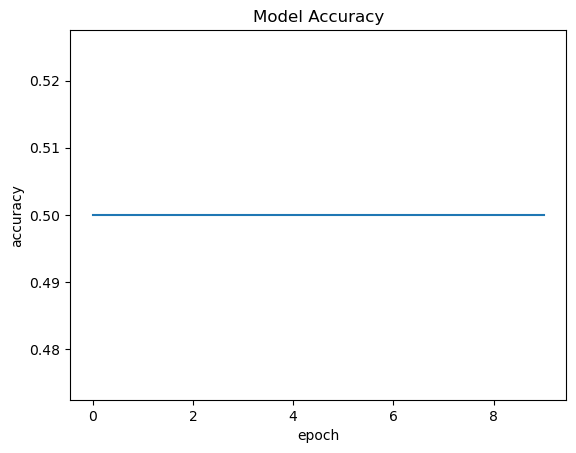

In [64]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

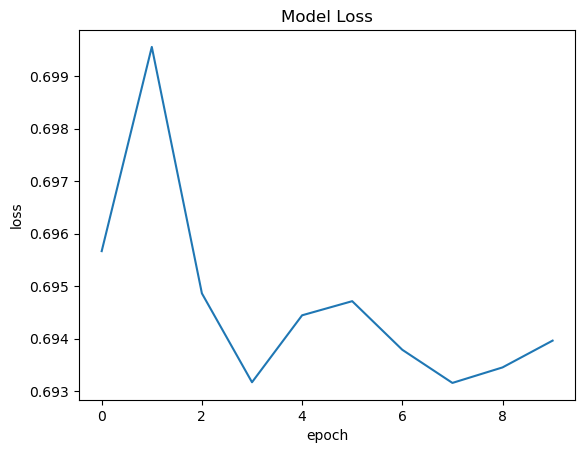

In [65]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [66]:
res = model2.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 1s 764ms/step
[[0.4804086]
 [0.4804086]
 [0.4804086]
 [0.4804086]
 [0.4804086]
 [0.4804086]
 [0.4804086]
 [0.4804086]
 [0.4804086]
 [0.4804086]
 [0.4804086]
 [0.4804086]] negative


C:\Users\sweth\AppData\Local\Temp\ipykernel_11424\479605851.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])
